#1. Problem Statement

Human Resource Department is faced with an intense task of ensuring people that are working in their company do not quit.

Reasons:


1.   Hiring a new Employee proves to be costly and is a very time consuming process
2.   In order to replace an existing resource it would require extensive assistance from the current employess to train the new joinee and get them ready.
2.   Generally, the cost of a new hire including the entire process is higher than the cost of retaining employees






##1.1 Pre Requisite

Dataset collected  by the HR Team on thei employees having columns like:

## 1.2 Objective

Development of a model that could predict which employees are likley to quit the job


# 2. Import Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Importing the Dataset

employee_df = pd.read_csv("/dataset/Human_Resources.csv")

employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##2.1 Initial Estimates and Intuition

###2.1.1 What to estimate? What is the type of Problem?
We can see there are numerous columns within the dataset, Initial Intuition:

We are trying to predict the "Attrition" value:

We know this is a Supervised machine Learning problem since the Target Label is provided.
Also, it is a classification problem since the Attrition variabl just as 2 possible classes, if the employee stayed or left the company.

###2.1.2 Intuition

1.   could age be something that might be a powerful feature as people generally having a higer age may prefer to not leave a company?
2.   could someone having a family having to travel frequently or maybe staying far from their office be dissatisfied with the job?
3. The Job Satisfactiond and Enviornment satisfaction could may be direct impliers of whether some one stays or leaves along with years since last promotion and work life balance.
4. Number of companies worked could also be helpful as maybe someone that has switched a lot of companies might be accustomed to trying to switch to another organisation. 

NOTE: These are just some initial inuitions i had and not really what the dataset says



In [3]:
# Checking the Data Types of the columns in the dataframe

employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Statistical Inference
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 2.1.3 Additional Insight



1.   We can see the min age for all employees in 18, therefore the "Over 18" column is not needed as all employees would be over 18.
2.   Same with the employeeCount Column, as it seems to be 1 for every entry.
3.  The Employee Number might not be of any true value either.
4.   Fortunately, no missing values in the dataset. so we would not have any imputation to perform.
5. Education , 	EnvironmentSatisfaction, JobInvolvement	, JobLevel, PerformanceRating, RelationshipSatisfaction, Stock Option and WorkLikeBalance look like ordinal values.



### **Checkpoint 1**

> First copy of Dataframe



In [5]:
#making a copy before proceeding further

employee_df_1 = employee_df.copy()

In [6]:
# Replacing Attrition and  Overrttime from Yes and No to 1 and 0 Respectively and dropping the column over18

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x=="Yes" else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x =="Yes" else 0)
employee_df.drop(columns='Over18', axis = 1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,80,0,17,3,2,9,6,0,8


# 3. Data Visualisation


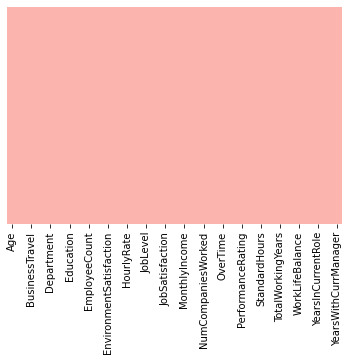

In [7]:
# visulaisation to see if there is any missing data.

sns.heatmap(employee_df.isnull(), yticklabels=False, cbar = False, cmap = 'Pastel1' )
plt.show()

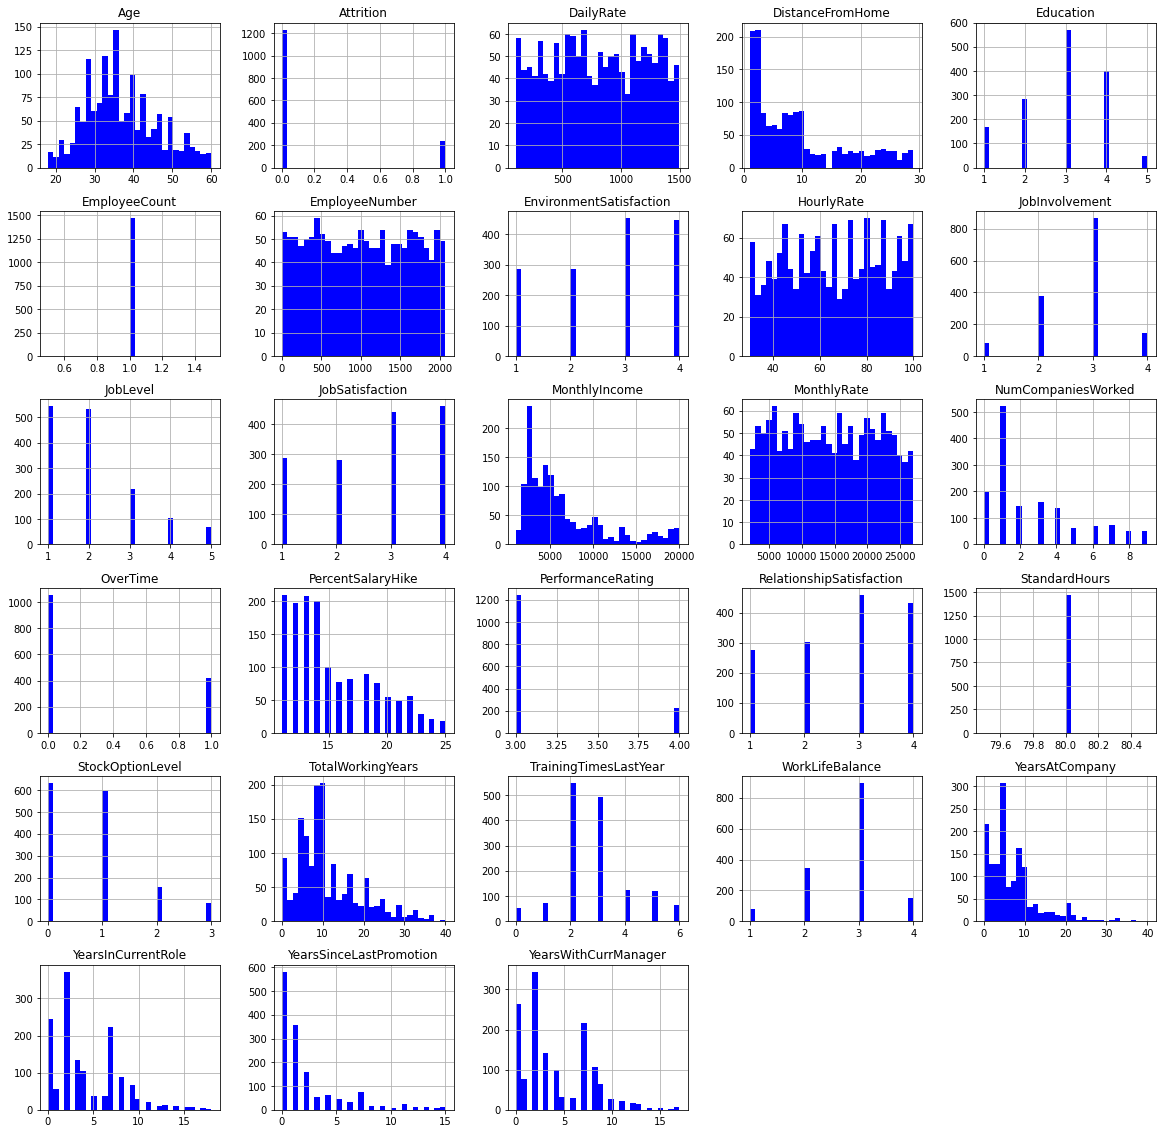

In [8]:
#plotting histograms for all fields to visualise distribution of values for all columns
employee_df.hist(bins = 30, figsize = (20,20) , color = 'b')
plt.show()

## 3.1 Insights from Histograms, Quick Overview

**Age:** Follows a Bell Curve, majority of the employees lie in the 30 - 40 Age Bracket

**Attrition:**From the Histogram, we can see that out of the 1400 employees, 1200+ stayed but approximately 200 didnt. if we could find the causes for these empoloyees maybe it would help reduce this number too.

**Distance From Home:**The Distance from Home follows a Skewed Curve where majority people are living closer to the Office.

**Distance From Home:**The Distance from Home follows a Skewed Curve where majority people are living closer to the Office.

**monthly income:** is tail heavy same with percent salary hike same with total working hours.

**Education:** Close to 1000 out of the 1400 empolyees are within the 3 a,d 4 range, it coulf mean that 3 and 4 represent a Bachelors and Masters Degree.

**Jobn Involvement:** Over 1000 Employees have given 3 or above for their job involvement.

**Job Level and Monthly Income:**Both features are right skewed, showing that Majority earn a lower income which probably is for the lower job level and a minute portion of higher job levels probably earn a higher income.

**Companies Changed:**approximately 250-300 employees have worked for grater that 6 companies. could this be determining factor?is a major set of attrition a subset of this?
 

**Employee count and Standard Hours** is same for all and **Employee number** varies for everyone and might not be really important for our model.


### **Checkpoint 2**

In [9]:
#creating second checkpoint
employee_df_2 = employee_df.copy()

In [10]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
#Dropping Employee_count, Employee Number and Standard Hours
employee_df.drop(columns = ['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis = 1, inplace = True)

In [12]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


## 3.2 Generating Seperate Dataframes for Employees that Left and stayed

In [13]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [14]:
# counting number of employees that left and employees that stayed.

print(f"Employees that Left: {len(left_df)}")
print(f"Percentage Employees that Left: {len(left_df)/len(employee_df)*100}%")

print(f"Employees that Stayed: {len(stayed_df)}")
print(f"Percentage Employees that Stayed: {len(stayed_df)/len(employee_df)*100}%")

Employees that Left: 237
Percentage Employees that Left: 16.122448979591837%
Employees that Stayed: 1233
Percentage Employees that Stayed: 83.87755102040816%


In [15]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### 3.2.1 Understanding the differences between Employees that left and those that didnt
After Splitting the dataframes seperately,

we notice the below observations:

1. 16% Employees left the organisation
2. Average Employees that left are 4 years younger than the people that stayed
3. The Daily rate of Employee's that left is lower by 4.1 % than people that stayed.
4. The People that left have a marginally higher mean for distance from home
5. The Enviornment Satisfaction , Job Involvement and job satisfaction was lower for employees that decided to quit.
6. We also see, the average no of companies worked in for people that that left is higher on average.
7. The Stock Option is 10% lower for employees that left than those who didnt.
 


## 3.3 Correlations between the Features

From the correlation Matrix We infer that:



1.   Total Working Years is positively Corelated to Job Level and Monthly Income, which does make sense as majority employees that has been with an organisation for longer tends to be at a higher positing and higher pay.

2.   Also, Percentage Salary Hike and Performance Rating are positively co-related too, as a persons performance rating is high so is the salary hike during promotion cycles.

3. Job Level and Monthly Income are positively Co related too, ass a job level increases, since it is ordinal so does the monthly pay.

4. In Terms of attrition, it is negatively co-related to age,Job Level and Monthly Income,stock options , total working years,and the last few parameter that are linked to total working years and positively co related to overtime. therefore, these two parameters might be playing some part in an employee leaving.



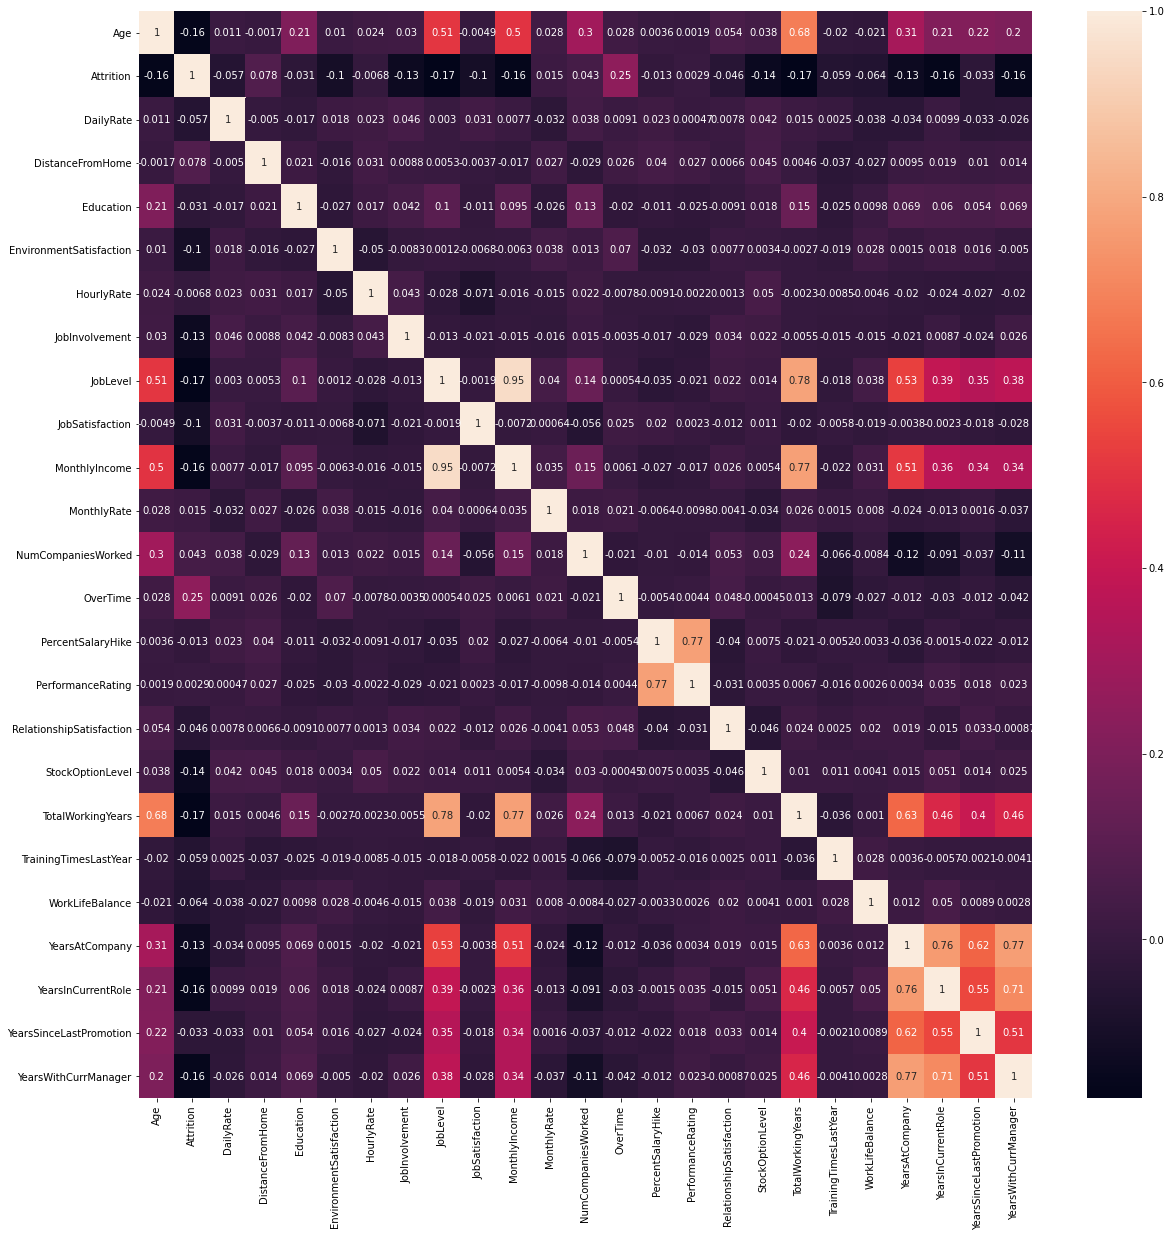

In [17]:
correlations = employee_df.corr()
f, aax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True)
plt.show()

### 3.3.1 Checking the Impact of Age on Attrition

from the count plot below, we see that :



1.   28 - 31 is the age gap where the number of employees that leave a company. some explainations could possible be that they decide to start their family, get married or having a child and have a bigger commitment where a hike through a job switch might be beneficial.

2.   Beyond the age of 40, the number of people leaving reduces. This could mostly due to the fact that people have settled in their lives , have a house family with kids going to school in the same localityand switching jobs could impact otehr aspects of life. 



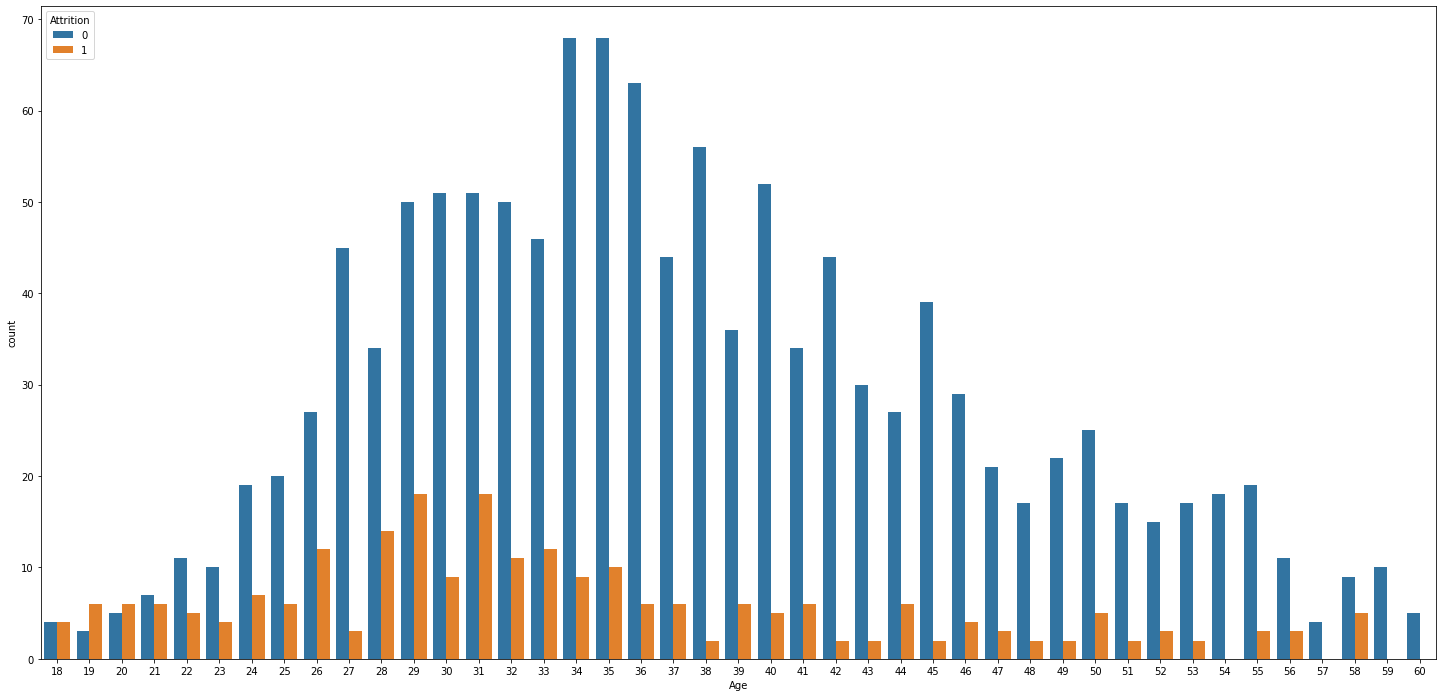

In [18]:
plt.figure(figsize = [25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)
plt.show()

### 3.3.2 Checking the Impact of (Categorical Variables) Job Role, Marital Status , Job Involvement and Job Role on Attritition



*   **Job Role:** In terms of ratio, The sales representative is more likely to quit as compared to a Research Director, it could have to do with the pay or job satisfaction in those positions.

*   **Marital Status:** In terms of marital status, as we inferred earlier. single people do tend to leave and search for opportunities whereas someone who has had a family tend to stay.

*   **Job Involvement:** People with lower job involvement do tend to opt for other opportunities.

*   **Job Role:** From the countplot, it shouws that people having a lower job role are likely to switch companies likely due to them being in the early stage of career.



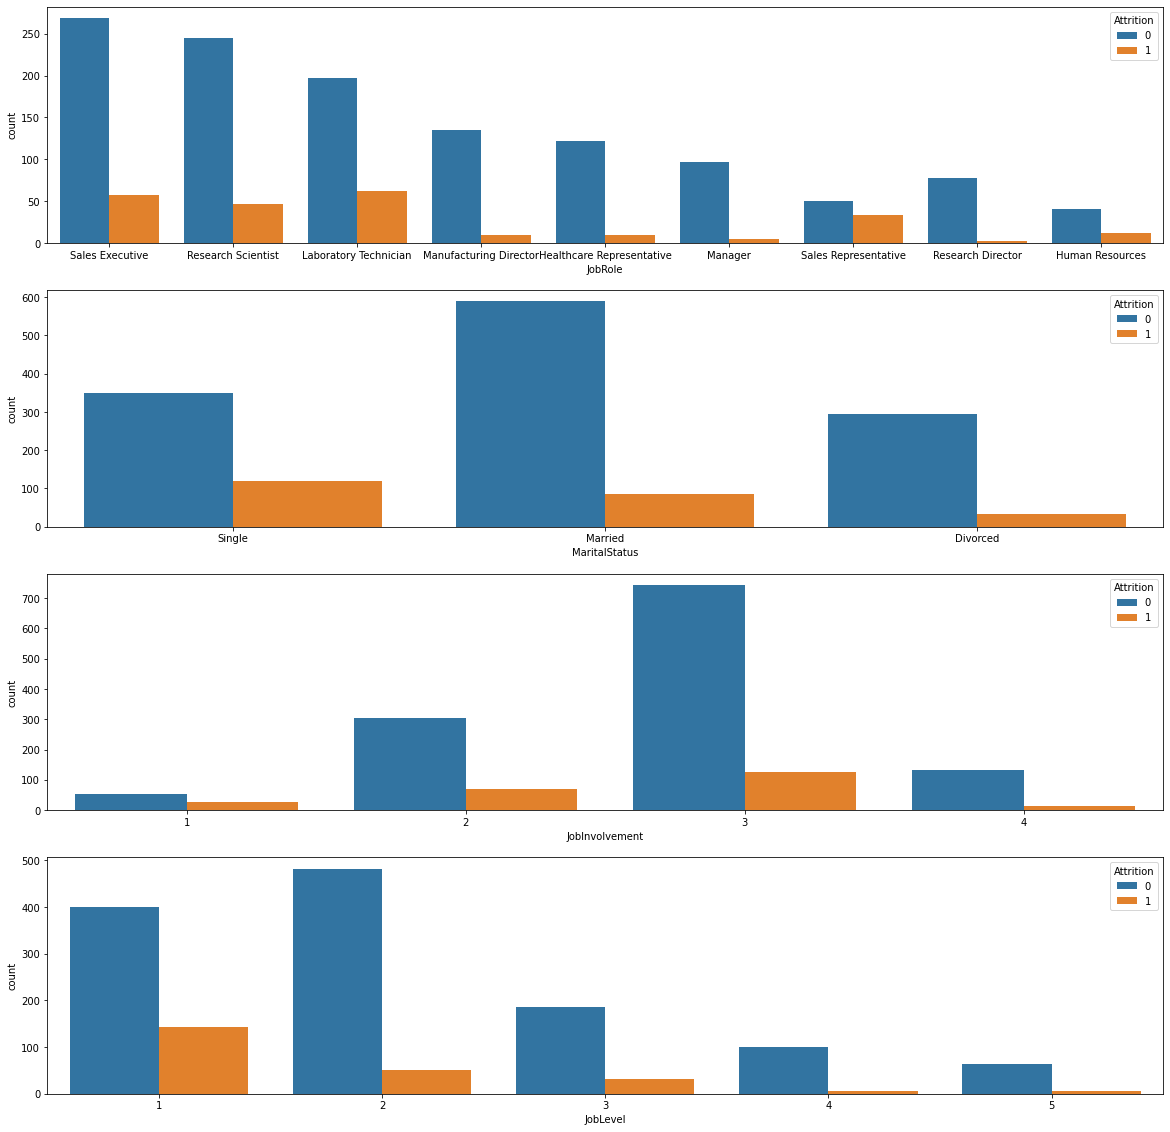

In [19]:
plt.figure(figsize = [20,20])

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = "Attrition" , data=employee_df)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = "Attrition" , data=employee_df)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = "Attrition" , data=employee_df)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = "Attrition" , data=employee_df)

plt.show()


### 3.3.3 Checking the Impact of (Continous Variables) on Attritition

using using Kernel Density Estimate plots for vcisualizing the Probability Density of Continous Variables

**Observations**:


1.   **Distance From Home:** Employees stayingh closer to Office tend to stay whereas, as distance from home increases so does the probability of leaving.

1.   **Years with Manager:** Employees who have more than 5 years with a manger tend to be more inclined towards staying within the organisation.

1.   **Total Years Worked:** Employee having spent less than 5 years within the organisation are more likely to leave.


In [20]:
def plot_kde(feature, xlabel):
    '''
    Function to plot KDE map for continous features comparing employees that left and those that stayed
  
    params: 
      feature: continous feature to compare in the KDE plot 
    xlabel: label name for the graph on x axis
    
    returns: 
      kde plot
    '''
    plt.figure(figsize = (12,8))

    sns.kdeplot(left_df[feature], label = "Employees who left", shade = True, color = 'b')
    sns.kdeplot(stayed_df[feature], label = "Employees who stayed", shade = True, color = 'r')

    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

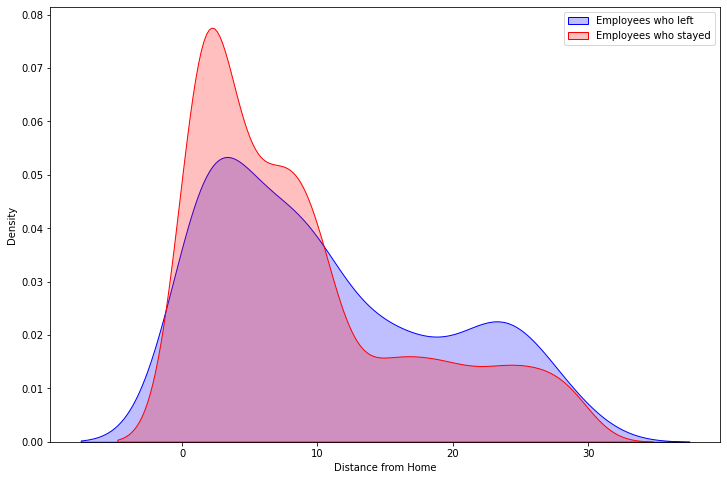

In [21]:
# Checking the impact of Distance from Home
plot_kde('DistanceFromHome',"Distance from Home")

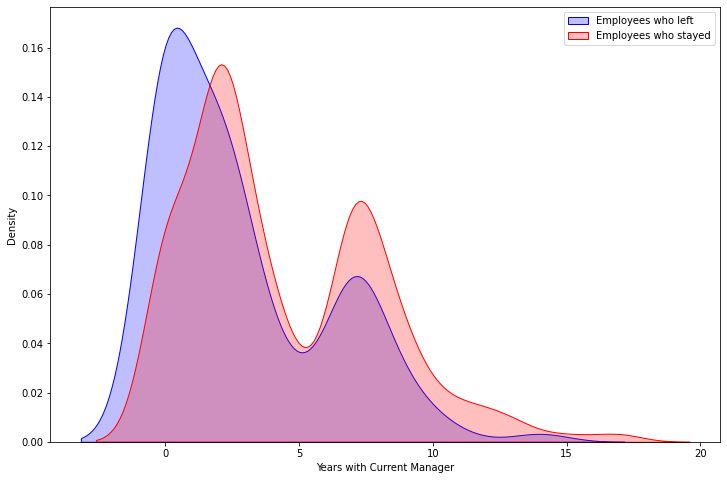

In [22]:
#Years with Current Manager
plot_kde('YearsWithCurrManager',"Years with Current Manager")

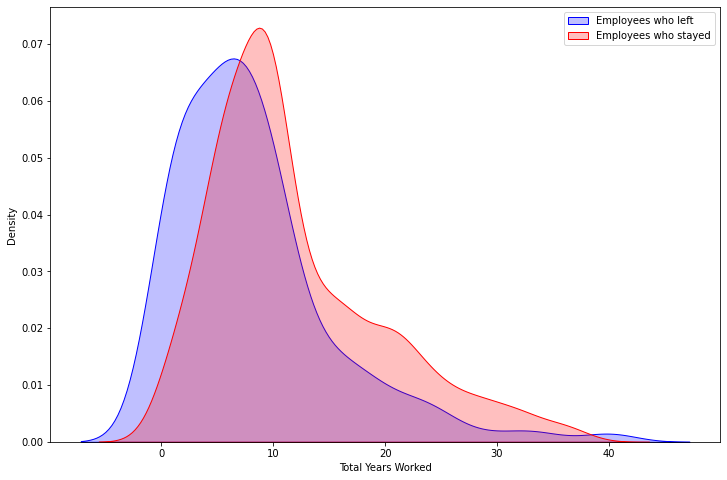

In [23]:
#Years with Current Manager
plot_kde('TotalWorkingYears',"Total Years Worked")

### 3.3.4 Checking Pay Differences for Job Roles and Gender



1.   Initially we witnessed that **Sales Representative** had a higher ratio of resigning and it was low for research directors.
from the box plot, it could be due to the pay for sales representative, we see that the **average pay is lowest** among other job profiles.

2.   The Pay scale for both male and female employees , doesnt vary that much.



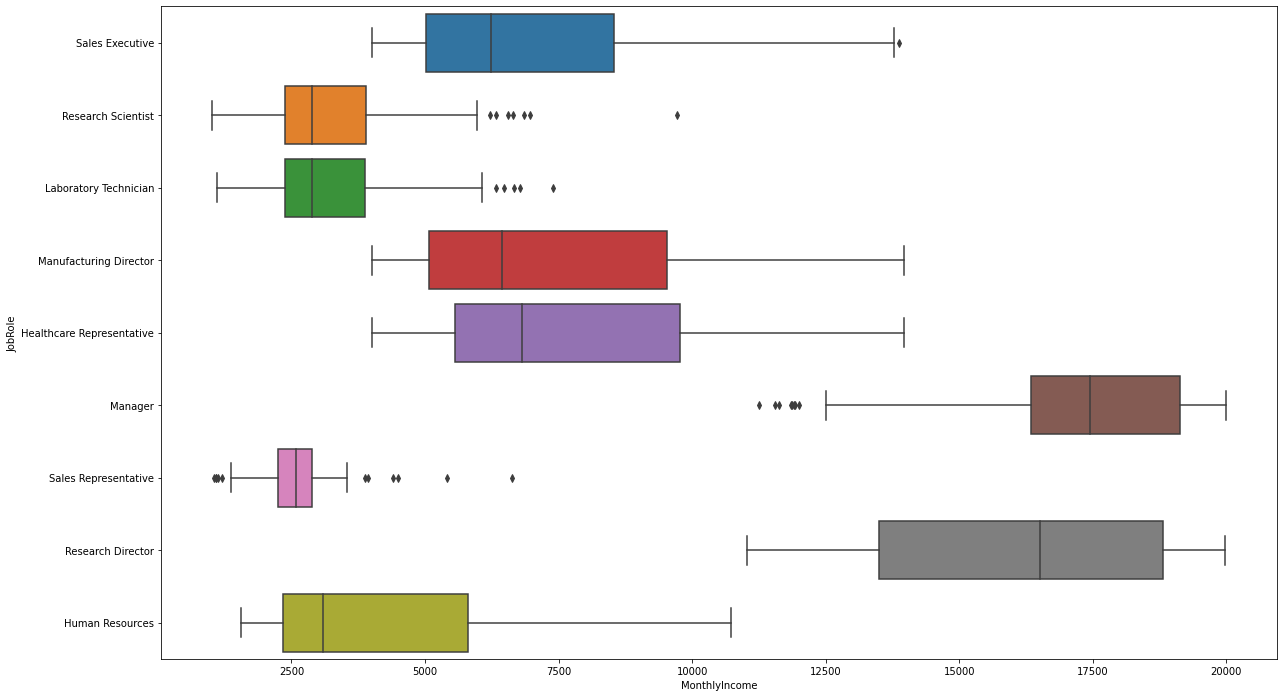

In [24]:
plt.figure(figsize=(20,12))
sns.boxplot(x = "MonthlyIncome", y='JobRole',data=employee_df)
plt.show()

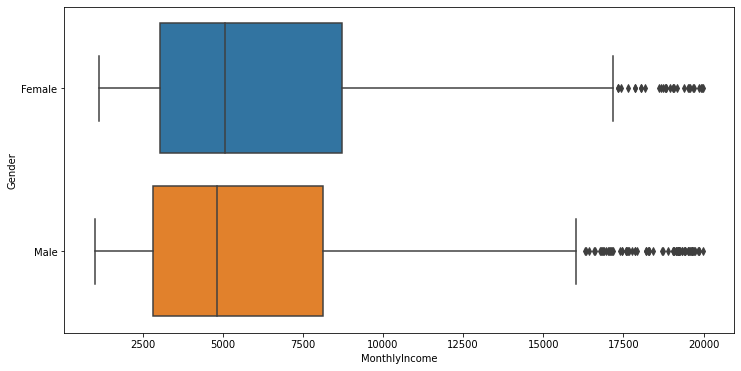

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "MonthlyIncome", y='Gender',data=employee_df)
plt.show()

# 4. Splitting Data into Test and Training & Data Cleaning

### **Checkpoint 3**

In [26]:
employee_df_3 = employee_df.copy()

## 4.1 Splitting Categorical Data 


In [27]:
# getting all categorical values from the dataframe and storing it in a seperate dataframe

X_cat = [column for column in employee_df.columns if employee_df[column].dtype == 'O']
X_cat = employee_df[X_cat]


In [28]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [29]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

X_cat = one_hot_encoder.fit_transform(X_cat).toarray()

X_cat = pd.DataFrame(X_cat)

## 4.2 Splitting Numerical Data



In [30]:
# Getting all numerical featres from the employee_df , since our dataframe had only int we used that, but if we had float would have to include that too
X_num = [column for column in employee_df.columns if employee_df[column].dtype=="int64"]
X_num = employee_df[X_num]



In [31]:
#copying attrition to a y parameter and dropping it from numerical dataframe
y = X_num['Attrition']
X_num.drop(columns = 'Attrition', inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 4.3 Merging both Categorical and Numerical Data

In [32]:
# Merging the categorical and Numerical Values
X_all = pd.concat([X_cat,X_num],axis = 1)

In [33]:
# Scaling the input Data

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)


### **Checkpoint 4**


In [34]:
employee_df_4 = pd.DataFrame(X)

# also saving the X and y as npz files
from numpy import save
save('X_Data.npy', X)
save('y_Target.npy', y)

## 4.4 Splitting into Train - Test Split


In [35]:
# importing the npy files for features X and targets y
from numpy import load

X = load('/dataset/X_Data.npy')
y = load('/dataset/y_Target.npy')

In [36]:
# Splitting into Train and Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=7)

In [37]:
# Checking the shape before proceeding
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1102, 50) (1102,)
(368, 50) (368,)


# 5. Training and Evaluating Classifiers

## 5.1 Cross Validation Function

In [38]:
# since our training data is small instead of using a seperate validation set, lets use K Fold and cross validation score to generate our scores

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

def cross_validate_models(model,X=X_train,y=y_train,splits = 4):
    '''
      function to generate a cross validation score for various models for the Employee Retention Dataset

      params:
      -------
          X(numpy array): numpy array consisting of the preprocessed and cleaned Training Data
          y(numpy array): numpy array of corresponding target values for X
          model(object): model to try for the training data
          split(int): the number of folds for k- fold cross validation, default is 4
      
      returns:
      --------
          cross validation mean score of model accuracy
    '''

    #initialising the cross-validation procedure
    cv = KFold(n_splits=splits, random_state=42,shuffle=True)

    score = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1)

    mean_score = score.mean()*100

    return mean_score

def plot_confusion_matrix(y_pred,y_actual):
    '''
    Function to plot confusion matrix and generate classification report for given
    arrays of predicted and actual values.

    params:
    -------
        y_pred(np array): array of predicted values 
        y_actual(np_array): array of actual target values

    returns:
    --------
        Plots Confusion Matrix
        Generated Classification Report
    '''

    # generating confusion matrix and classification report
    cm = confusion_matrix(y_pred,y_actual)
    sns.heatmap(cm, annot=True,cmap='jet')

    print("Classification Report:\n")
    print(classification_report(y_pred,y_actual))



## 5.1 Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression()
lr_scores = cross_validate_models(lr_model)
print(f'Logistic Regression Accuracy : {lr_scores:.2f}%')

Logistic Regression Accuracy : 88.39%


## 5.2 Random Forest Classifier


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_scores = cross_validate_models(rf_model)
print(f"Random Forest Accuracy: {rf_scores:.2f}%")

Random Forest Accuracy: 85.48%


## 5.3 Deep Learning Model


In [41]:
import tensorflow as tf

#creating a sequential Model with 4 Layers
dl_model = tf.keras.models.Sequential()
dl_model.add(tf.keras.layers.Dense(units=500,activation='relu', input_shape=(50,)))
dl_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
dl_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
dl_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [42]:
dl_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [43]:
dl_model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = dl_model.fit(X_train, y_train, epochs = 100, batch_size = 50)

In [ ]:
from statistics import mean
print(f"Deep Learning Model Accuracy: {mean(history.history['accuracy'])*100}%")

Deep Learning Model Accuracy: 100.0%


## 5.4 Observations:

By running the three models , we noticed that Logistic Regression is giving a decent cross validation accuracy of around 88% , the Random Forest Classifier is fairly Lower and our deep neural network is overfitting.

All the models could probably be imporved by fine tuning the hyper parameters.

Will utilise Logistic Regression for this Problem Statement to further optimise it.

Another Aspect that could be tried would be a synthetic sample generation using **SMOTE** which might improve the imbalance between employees that left and those that didnt.



# 6. Hyper Parameter Tuning for Logistic Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

# creating a pipeline to try out various parameters for the Logistic Regression Model
# using Randomised Search CV

pipeline = make_pipeline((LogisticRegression()))

parameters = {
                  "logisticregression__penalty": ['l2'],
                  "logisticregression__C": np.logspace(0, 4, 10),
                  "logisticregression__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 }

r_search = RandomizedSearchCV(pipeline,parameters,cv = 5,verbose = 0,scoring='f1_weighted')
model = r_search.fit(X_train,y_train)

#Printing the best parameters to generate the final model
model.best_params_
model.best_estimator_


In [46]:
from sklearn.pipeline import Pipeline

# Generating the Final Pipeline

model = Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=7.742636826811269, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='saga',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [47]:
print(f"Cross Validation Accuracy of Fine Tuned Model: {cross_validate_models(model):.2f}%")

Cross Validation Accuracy of Fine Tuned Model: 87.84%


In [48]:
# Fittinfg the Final Model with the Training Data

model.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=7.742636826811269, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='saga',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [49]:
y_pred = model.predict(X_test)

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       330
           1       0.45      0.66      0.53        38

    accuracy                           0.88       368
   macro avg       0.70      0.78      0.73       368
weighted avg       0.91      0.88      0.89       368



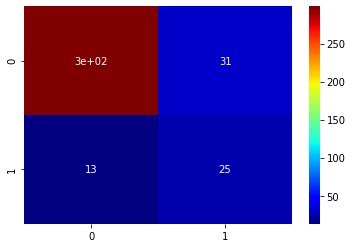

In [50]:
plot_confusion_matrix(y_pred,y_test)

# 7. Saving the Model and Scaler

In [52]:
import pickle

with open('employee_retention_model' , 'wb') as file:
  pickle.dump(model,file)

with open('employee_retention_scaler', 'wb') as file:
  pickle.dump(scaler,file)